<center>

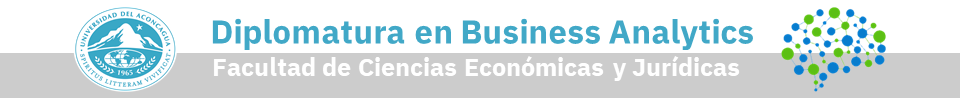

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Rotación de Clientes - Customer Churn

</font>
</center>

## Descripción del dataset

**El dataset pertenece a una compañía que ofrece servicio telefónico, internet, servicios web, etc.**
**La deserción de clientes (también conocida como pérdida de clientes) es una de las mayores causas de pérdida de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a diseñar estrategias de fidelización.**

---

CustomerID: ID único de cada cliente

Count: Valor de 1 para realizar sumas de clientes

Country: País donde vive cliente

State: Estado donde vive el cliente

City: Ciudad donde vive el cliente

Zip Code: Codigo postal del cliente

Lat Long: Combinación de la latitud y longitud del cliente

Latitude: Latitud

Longitude: Longitud

Gender: Genero del cliente

Senior Citizen: Indica si el cliente es mayor de 65 años (Si, No)

Partner: Indica si el cliente tiene pareja (Si, No)

Dependents: Indica si el cliente vive con dependientes (Si, No). Dependientes pueden ser hijos, parientes, padres

Tenure Months: Indica la cantidad de meses que el cliente forma parte de la compañia (Antiguedad)

Phone Service: Indica si el cliente tiene contratado servicio telefónico con la compañia (Si, No)

Multiple Lines: Indica si el cliente tiene contratadomúltiples líneas telefónicas (Si, No)

Internet Service: Indica si el cliente tiene contratado servicio de internet (No, DSL, Fiber Optic, Cable)

Online Security: Indica si el cliente tiene contratado el servicio de seguridad online (Si, No)

Online Backup: Indica si el cliente tiene contratado el servicio de backup - copia de seguridad (Si, No)

Device Protection: Indica si el cliente tiene contratado el servicio de protección del dispositivo (Si, No)

Tech Support: Indica si el cliente tiene contratado el servicio de soporte técnico para agilizar tiempos de respuesta (Si, No)

Streaming TV: Indica si el cliente tiene contratado un servicio de TV por streaming con un proveedor externo (Si, No). La compañia no genera cargos adicionales por este servicio

Streaming Movies: Indica si el cliente tiene contratado un servicio de películas y series por streaming con un proveedor externo (Si, No). La compañia no genera cargos adicionales por este servicio

Contract: Indica el contrato que posee el cliente con la compañía (Month-to-Month, One Year, Two Year)

Paperless Billing: Indica si el cliente ha elegido factura electrónica (Si, No)

Payment Method: Indica como el cliente paga su factura (Bank Withdrawal, Credit Card, Mailed Check)

Monthly Charge: Indica el monto MENSUAL de todos los servicios que paga el cliente

Total Charges: Indica el monto HISTÓRICO que ha pagado el cliente desde su primer factura

Churn Label: Yes = El cliente abandonó la empresa. No = El cliente continua siendo cliente

Churn Value: Es el valor binario de Churn Label Yes = 1, No = 0

Churn Score: Es un score generado de la probabilidad de que abandone la compañía

CLTV: Es el valor de vida del cliente (Customer Lifetime Value). Mientras más alto es el valor, más valioso es el cliente. Se debe monitorear clientes con alto CLTV

Churn Reason: Razón por la cual el cliente abandonó la compañia

# Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/test.csv")

In [3]:
#data = pd.concat([train, test])
#data.info()

In [4]:
train.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,5552,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,No,Yes,No,45,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
1,5805,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,No,Yes,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2,2640,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3,3976,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,No,Yes,No,46,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
4,6429,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,No,No,No,40,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


#Instalación **pycaret** y su modelo de clasificación

In [5]:
!pip install pycaret #[full] #pyyaml==5.4.1

In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [7]:
from pycaret.classification import *

# Se eliminan las variables innecesarias

*En este punto se fueron probando con distintas variables activas e inactivas en el modelo, visualizando su "feature importance" en cada caso y quitando estas variables que se indican a continuación, se logró una mejora en las métricas objetivo.*

In [8]:
train.nunique()

Unnamed: 0           5274
CustomerID           5274
Count                   1
Country                 1
State                   1
City                 1127
Zip Code             1648
Lat Long             1648
Latitude             1648
Longitude            1647
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1474
Total Charges        4971
Churn Label             2
CLTV                 3019
Churn Reason           20
dtype: int64

In [9]:
train.drop(['Unnamed: 0', 'CustomerID', 'Count', 'Country', 'State','Lat Long', 'Longitude', 'Latitude',
            'Churn Reason', 'City', 'Zip Code', 'CLTV'], axis = 'columns', inplace=True) 
test.drop(['Unnamed: 0', 'CustomerID', 'Count', 'Country', 'State','Lat Long', 'Longitude', 'Latitude',
            'Churn Reason', 'City', 'Zip Code', 'CLTV'], axis = 'columns', inplace=True)

# Preprocesamiento Modelo 1 (setup)

*Se realizaron pruebas con distintos hiperparámetros y estos fueron los más adecuados para el modelo a procesar.*

In [10]:
modelo1 = setup(data = train, target = "Churn Label", session_id=123, test_data=test, 
                 remove_multicollinearity=True, multicollinearity_threshold= 0.9,
                normalize=True, normalize_method='robust', 
                transformation= True, transformation_method='yeo-johnson', fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,Churn Label
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(5274, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparación de modelos

- Para este caso priorizaremos mayor Recall ya que buscamos predecir qué clientes abandonan la empresa y evitar los falsos negativos.


In [11]:
mejor_modelo1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7952,0.8593,0.7031,0.6003,0.6473,0.5043,0.5078,1.216
lightgbm,Light Gradient Boosting Machine,0.7943,0.8520,0.6202,0.6147,0.6167,0.4763,0.4768,0.334
rf,Random Forest Classifier,0.7867,0.8342,0.5748,0.6075,0.5900,0.4461,0.4469,1.117
ada,Ada Boost Classifier,0.7820,0.8583,0.7541,0.5701,0.6491,0.4954,0.5058,0.425
et,Extra Trees Classifier,0.7746,0.8083,0.5309,0.5875,0.5569,0.4065,0.4079,1.063
lr,Logistic Regression,0.7666,0.8569,0.7924,0.5443,0.6450,0.4801,0.4992,0.463
ridge,Ridge Classifier,0.7620,0.0000,0.7867,0.5382,0.6388,0.4707,0.4899,0.086
lda,Linear Discriminant Analysis,0.7620,0.8566,0.7874,0.5381,0.6390,0.4709,0.4902,0.120
nb,Naive Bayes,0.7575,0.8409,0.7683,0.5328,0.6290,0.4576,0.4747,0.085
dt,Decision Tree Classifier,0.7393,0.6841,0.5656,0.5112,0.5365,0.3559,0.3572,0.121


## Se decide utilizar Gradient Boosting Classifier

In [12]:
gbc = create_model('gbc',fold = 10)
print(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7689,0.8531,0.6738,0.5556,0.6090,0.4471,0.4513
1,0.8163,0.8739,0.7589,0.6294,0.6881,0.5595,0.5644
2,0.8030,0.8547,0.7021,0.6149,0.6556,0.5185,0.5208
3,0.7841,0.8333,0.6197,0.5946,0.6069,0.4582,0.4583
4,0.8008,0.8678,0.6879,0.6139,0.6488,0.5104,0.5120
5,0.7989,0.8657,0.7305,0.6023,0.6603,0.5193,0.5241
6,0.7856,0.8397,0.7234,0.5795,0.6435,0.4929,0.4991
7,0.8046,0.8728,0.7376,0.6118,0.6688,0.5319,0.5366
8,0.7970,0.8648,0.7021,0.6037,0.6492,0.5075,0.5103
9,0.7932,0.8672,0.6950,0.5976,0.6426,0.4983,0.5011


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Se optimiza el modelo1 (tune) pero no se logra mejorar las métricas del modelo

In [13]:
optimizar_gbc = tune_model(gbc)
print(optimizar_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7689,0.8439,0.6170,0.5613,0.5878,0.4278,0.4287
1,0.8106,0.8641,0.6950,0.6323,0.6622,0.5310,0.5321
2,0.7898,0.8384,0.6312,0.6014,0.6159,0.4713,0.4716
3,0.7992,0.8293,0.5915,0.6364,0.6131,0.4778,0.4784
4,0.8083,0.8720,0.6454,0.6408,0.6431,0.5121,0.5121
5,0.7856,0.8514,0.6596,0.5886,0.6221,0.4731,0.4746
6,0.7951,0.8371,0.6738,0.6051,0.6376,0.4953,0.4967
7,0.7856,0.8573,0.6667,0.5875,0.6246,0.4754,0.4772
8,0.7989,0.8590,0.6667,0.6144,0.6395,0.5003,0.5011
9,0.7894,0.8504,0.6383,0.6000,0.6186,0.4733,0.4737


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Se realizan métodos de ensamble del modelo1 y se logra mejorar levemente las métricas con el Bagging

In [14]:
bagged_gbc = ensemble_model(gbc, method = 'Bagging') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7822,0.8543,0.6738,0.5793,0.6230,0.4710,0.4737
1,0.8144,0.8722,0.7589,0.6257,0.6859,0.5559,0.5611
2,0.7917,0.8546,0.6879,0.5951,0.6382,0.4930,0.4955
3,0.8030,0.8362,0.6408,0.6319,0.6364,0.5013,0.5013
4,0.8083,0.8689,0.7021,0.6266,0.6622,0.5290,0.5307
5,0.8027,0.8675,0.7305,0.6095,0.6645,0.5263,0.5307
6,0.7799,0.8397,0.6809,0.5749,0.6234,0.4694,0.4728
7,0.8008,0.8750,0.7305,0.6059,0.6624,0.5228,0.5274
8,0.8027,0.8668,0.7092,0.6135,0.6579,0.5202,0.5229
9,0.8083,0.8725,0.7234,0.6220,0.6689,0.5351,0.5381


In [15]:
boosted_gbc = ensemble_model(gbc, method = 'Boosting')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.8436,0.6241,0.5986,0.6111,0.4654,0.4656
1,0.8258,0.8624,0.6950,0.6667,0.6806,0.5608,0.5611
2,0.7803,0.8390,0.5532,0.5954,0.5735,0.4258,0.4264
3,0.7614,0.8088,0.5000,0.5635,0.5299,0.3707,0.3719
4,0.8027,0.8575,0.6170,0.6350,0.6259,0.4919,0.4920
5,0.8083,0.8566,0.6809,0.6316,0.6553,0.5228,0.5235
6,0.7970,0.8364,0.6383,0.6164,0.6272,0.4877,0.4879
7,0.7951,0.8572,0.6525,0.6093,0.6301,0.4886,0.4892
8,0.7951,0.8551,0.6099,0.6187,0.6143,0.4748,0.4748
9,0.8083,0.8564,0.6028,0.6538,0.6273,0.4986,0.4993


## Evaluacion Modelo1

In [16]:
evaluate_model(bagged_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predicción sobre datos de prueba

In [17]:
predict_model(bagged_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7844,0.8582,0.6659,0.5744,0.6168,0.4679,0.4704


,Tenure Months,Monthly Charges,Total Charges,Gender_Male,Senior Citizen_No,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Device Protection_No,Device Protection_Yes,Tech Support_No,Tech Support_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label,Label,Score
0,-0.958062,-0.057205,-0.754322,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,No,No,0.8604
1,1.200965,0.624696,1.322288,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,No,No,0.9265
2,-1.373807,-1.263076,-1.348893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes,Yes,0.8398
3,-0.759387,0.994784,-0.234776,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Yes,Yes,0.7110
4,-1.215089,-1.389723,-1.290308,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Yes,No,0.6701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1.326575,-1.418709,-0.123832,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,No,No,0.9817
1754,-0.072925,-0.410225,-0.028667,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,No,No,0.8364
1755,-1.373807,-1.427905,-1.356048,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,Yes,0.5055
1756,-1.215089,-1.373859,-1.279954,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Yes,No,0.6475


#Finalizando el modelo

In [18]:
final_gbc = finalize_model(bagged_gbc)
print(final_gbc)


BaggingClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                            criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.1,
                                                            loss='deviance',
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                              

#Guardado del modelo

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
save_model(final_gbc,"/content/drive/MyDrive/Colab Notebooks/Diplomatura Business Analytics/TP FINAL/modelo_final")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Churn Label', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                                              min_weight_fraction_leaf=0.0,
                                                                              n_estimators=100,
                                                                     